# Introduction to Convulational Neural Network and Computer Vision with TensorFlow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. such as camera of self-driving car recognizing the car in fornt.

## Get the data

The images we're working are from the food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101/version/1 

However we've modified it to only use two classes (pizza & steak ) using the image data modification notebook https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

**Note:** We start with smaller dataset so we can experiment quickly and figure what works (or better yet does'nt work) before scaling up.

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip the file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-02-09 16:53:19--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.147.128, 142.250.148.128, 209.85.234.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.147.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   189MB/s    in 0.6s    

2022-02-09 16:53:20 (189 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the date (become one with it)

A very crucial step at the begnning of any machine learning project is becoming one with that data.

And for computer vision project.. this means visualizing many samples of your data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# walkthrough pizz_steak directory and list all number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.


In [ ]:
# The extra file in our pizza_steak directory is ".Ds_Store"

!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Feb  7 17:26 .
drwxr-xr-x 1 root root 4096 Feb  7 17:26 ..
drwxr-xr-x 4 root root 4096 Feb  7 17:26 test
drwxr-xr-x 4 root root 4096 Feb  7 17:26 train


In [ ]:
# Another way to find out how many images are in file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

 To visualize our images, first let's get the class names progammatically.

In [ ]:
# Get the classnames progammatically
import pathlib
import numpy as np
data_dir =pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")])) # created a list of classnames from subdirector
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Set up a target directory (we'll see it from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img=mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"image shape: {img.shape}") # show the shape of image

  return img

['2742044.jpg']
image shape: (512, 512, 3)


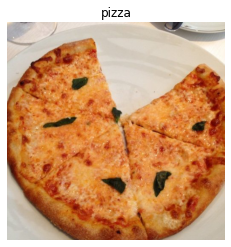

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                      target_class="pizza")

In [ ]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[255, 239, 210],
        [255, 237, 208],
        [255, 234, 205],
        ...,
        [220, 212, 199],
        [220, 212, 199],
        [221, 213, 200]],

       [[250, 230, 203],
        [248, 228, 201],
        [246, 226, 199],
        ...,
        [218, 211, 195],
        [218, 211, 195],
        [217, 210, 194]],

       [[241, 221, 196],
        [240, 220, 195],
        [239, 219, 194],
        ...,
        [216, 209, 193],
        [216, 209, 193],
        [215, 208, 192]],

       ...,

       [[202, 202, 194],
        [202, 202, 194],
        [202, 202, 194],
        ...,
        [196, 185, 167],
        [195, 184, 166],
        [195, 184, 166]],

       [[203, 203, 195],
        [203, 203, 195],
        [203, 203, 195],
        ...,
        [195, 184, 166],
        [194, 183, 165],
        [194, 183, 165]],

       [[204, 204, 196],
        [204, 204, 196],
        [204, 204, 196],
        ...,
        [194, 183, 16

In [ ]:
# View image shape
img.shape #  retutn width, height, colored channels

(512, 512, 3)

**Note:** As we've discussed before, many machine learning models, including neural networks prefer the value they work with to be between 0 and 1.Knowing this, one of the preprocessing steps for working with images to scale(also referred to as normalize) their pixel value by dividing the image array by 255.(since 255 is maximum pixel value).

In [ ]:
# Get all the pixel values in between 0 & 1.
img/255.

array([[[1.        , 0.9372549 , 0.82352941],
        [1.        , 0.92941176, 0.81568627],
        [1.        , 0.91764706, 0.80392157],
        ...,
        [0.8627451 , 0.83137255, 0.78039216],
        [0.8627451 , 0.83137255, 0.78039216],
        [0.86666667, 0.83529412, 0.78431373]],

       [[0.98039216, 0.90196078, 0.79607843],
        [0.97254902, 0.89411765, 0.78823529],
        [0.96470588, 0.88627451, 0.78039216],
        ...,
        [0.85490196, 0.82745098, 0.76470588],
        [0.85490196, 0.82745098, 0.76470588],
        [0.85098039, 0.82352941, 0.76078431]],

       [[0.94509804, 0.86666667, 0.76862745],
        [0.94117647, 0.8627451 , 0.76470588],
        [0.9372549 , 0.85882353, 0.76078431],
        ...,
        [0.84705882, 0.81960784, 0.75686275],
        [0.84705882, 0.81960784, 0.75686275],
        [0.84313725, 0.81568627, 0.75294118]],

       ...,

       [[0.79215686, 0.79215686, 0.76078431],
        [0.79215686, 0.79215686, 0.76078431],
        [0.79215686, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we have to need a way:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images 
* Compile our CNN
* Fit our CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set a seed
tf.random.set_seed(42)

# Preprocess data (get all the value b/w 0 & 1, also called scaling/normalizations)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to our data directory
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data form directories and turns into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")                                                                                   
])

# Comile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit our CNN
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 264ms/step - loss: 0.6108 - accuracy: 0.6680 - val_loss: 0.4842 - val_accuracy: 0.7780
Epoch 2/5
47/47 [==============================] - 11s 236ms/step - loss: 0.4327 - accuracy: 0.8047 - val_loss: 0.3625 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 11s 234ms/step - loss: 0.3920 - accuracy: 0.8360 - val_loss: 0.3308 - val_accuracy: 0.8800
Epoch 4/5
47/47 [==============================] - 11s 239ms/step - loss: 0.3483 - accuracy: 0.8493 - val_loss: 0.3297 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 12s 246ms/step - loss: 0.3029 - accuracy: 0.8767 - val_loss: 0.3060 - val_accuracy: 0.8640


**Note:** if the above cell taking longer then ~10 seconds per epochs, make sure u are using a GPU by going to Runtime -> Change Runtime type -> Hardware Accelarotor -> GPU (you may have to rerun some cells above). 

In [ ]:
# Get a summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## using the same model as before

Let's replicate the model we've built in our previous section to see if it work with our image data.

The model we're building is from [TensorFlow playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.04925&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) 

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate TensorFlow playground model
model_2 =tf.keras.Sequential([
   tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
   tf.keras.layers.Dense(4, activation="relu"),
   tf.keras.layers.Dense(4, activation="relu"),
   tf.keras.layers.Dense(1, activation="sigmoid")                                  
])

# Compile a model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 239ms/step - loss: 1.6637 - accuracy: 0.4927 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 221ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 210ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 10s 211ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
# Get a model_2 summary
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1),
model_2 perform terribly.... let's try to improve it.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above but let's step it up a notch)
model_3 =tf.keras.Sequential([
   tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
   tf.keras.layers.Dense(100, activation="relu"),
   tf.keras.layers.Dense(100, activation="relu"),
   tf.keras.layers.Dense(100, activation="relu"),
   tf.keras.layers.Dense(1, activation="sigmoid")                                  
])

# Compile a model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 217ms/step - loss: 2.7839 - accuracy: 0.6093 - val_loss: 1.0917 - val_accuracy: 0.6160
Epoch 2/5
47/47 [==============================] - 10s 211ms/step - loss: 0.6960 - accuracy: 0.7327 - val_loss: 0.5359 - val_accuracy: 0.7520
Epoch 3/5
47/47 [==============================] - 10s 213ms/step - loss: 0.6257 - accuracy: 0.7460 - val_loss: 0.5129 - val_accuracy: 0.7740
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.6242 - accuracy: 0.7307 - val_loss: 0.4747 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 10s 214ms/step - loss: 0.6452 - accuracy: 0.7380 - val_loss: 0.7997 - val_accuracy: 0.6860


In [ ]:
# Get summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


**Note:** you can think of trainable parameters as **patterns a model can learn from data**. intuitly, you might think more is better.And in lots of cases, it is.But in this case, the difference here is two different styles of model we're using.Where are a series of dense layers has a number of learnable parameters connected to each other and hence a higher number of  possible learnable patterns, **a convolutional neural network to sort out and learn a most importent pattern in image**. so even though these are less learnable parameters in our convolutional neural network, these are more helpful often helpful in dechipering between differnt feature in an image.

## Binary classification....let's break it down

1. Become one with data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here is scaling/normalizing & turning our data into batches)
3. Create a model (start with basleline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat untill satisfied (experiment, experiment, experiment)

### 1. Become one with data

['2136662.jpg']
image shape: (512, 512, 3)
['3546278.jpg']
image shape: (512, 289, 3)


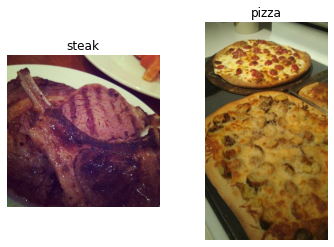

In [ ]:
# visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("/content/pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)



In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

our next step is to turn our data into **batches**.

A batch is small subset of data. Rather than look at all ~10,000 images at one time, a model might look only 32 at a time.

It does this for a couple of reasons:
1. 10000 images (or more) might not fit into the memory of your processor(GPU).
2.Trying to learn the patterns in 10,000 images in one hit could result model not being able to learn very well.

Why 32?


Because 32 is good for your health...

In [ ]:
# Create train and test data generator and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,  # Target directory of images
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary",    # type of data you're working with
                                               batch_size=32)         #  size of minibatches to load data into

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of train data batch
images, labels = train_data.next() # get the "next" batch of images/labels of train_data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there
len(train_data)

47

In [ ]:
1500/32

46.875

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [ ]:
# view the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with baseline)

A baseline is a relatively simple model or exisiting result that you set up when begining a machine learning experiment then as you keep experimenting, you try to beat the baseline.

**Note:** In deep learning, there is almost an infinite amount of architecture you could create.So one of the best way to get start with something simple and see if it works on your data and introduce complexity as required(e.g look at which current model is performing best in the field for your problem).


In [ ]:
# Make the creating of our model little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create a model (this will be our baseline, a layer convulational neural network)
model_4 = Sequential([
  Conv2D(filters=10, # filter is the number of sliding windows going across an input.(higher = more complex model)
         kernel_size=(3, 3), # the size of sliding window going across sliding an input
         strides=(1, 1), # the size of the step the sliding window takes across an input
         padding="valid", # if "same" output shape as input shape, if "valid" output shape gets compressed
         activation="relu",
         input_shape=(224, 224, 3)), # input layer(specify input shape)
   Conv2D(10, 3, activation="relu"),
   Conv2D(10, 3, activation="relu"),
   Flatten(),
   Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)

])

In [ ]:
from tensorflow.python.keras.backend import binary_crossentropy
# Compile a model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 3. Fit the model

In [ ]:
# checks the length of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data,  # this is the combination of labels and samples data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 279ms/step - loss: 1.4749 - accuracy: 0.6313 - val_loss: 0.5037 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 12s 263ms/step - loss: 0.4741 - accuracy: 0.7880 - val_loss: 0.4241 - val_accuracy: 0.7960
Epoch 3/5
47/47 [==============================] - 11s 244ms/step - loss: 0.3711 - accuracy: 0.8500 - val_loss: 0.4011 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 12s 246ms/step - loss: 0.1969 - accuracy: 0.9340 - val_loss: 0.4776 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 12s 259ms/step - loss: 0.0900 - accuracy: 0.9747 - val_loss: 0.5614 - val_accuracy: 0.7940


### 5. Evaluating our model

It look like our model is learning something, let's evaluate it.

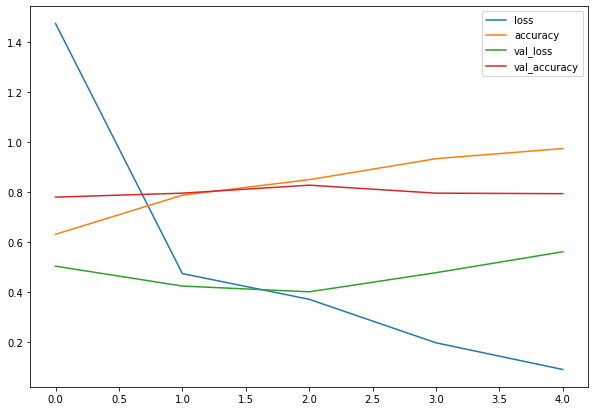

In [ ]:
# Let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="value_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="value_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

**Note:** When model's **validation loss start to increase** it's likely that model is **overfitting** the training dataset.This means, it's learning the patterns in training dataset **too well** and thus the model's ability to genralize to unseen data will be diminished.

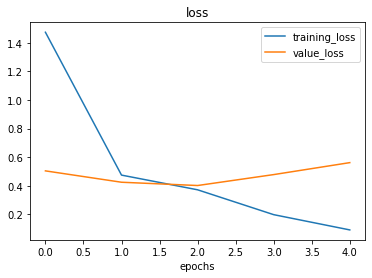

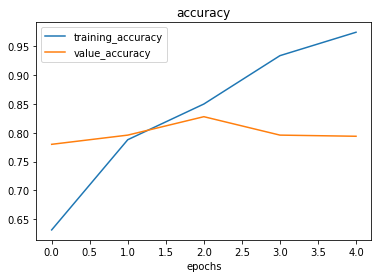

In [ ]:
# check out the loss and accuracy of model_4
plot_loss_curves(history_4)

### 6. Adjust a model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

ways too induce overfitting

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting

* Add data augmentation
* Add regularization layer (such as MaxPool2D)
* Add more data...

**Note:** Reducing overfitting is also known as **Regularization**.

In [ ]:
# Create a model (this is going to be our new baseline)
model_5 = Sequential([
   Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
   MaxPool2D(pool_size=2),
   Conv2D(10, 3, activation="relu"),
   MaxPool2D(),
   Conv2D(10, 3, activation="relu"),
   MaxPool2D(),
   Flatten(),
   Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 229ms/step - loss: 0.5840 - accuracy: 0.6913 - val_loss: 0.4268 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 11s 224ms/step - loss: 0.4667 - accuracy: 0.7833 - val_loss: 0.4061 - val_accuracy: 0.8240
Epoch 3/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4312 - accuracy: 0.8153 - val_loss: 0.3647 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 10s 220ms/step - loss: 0.4137 - accuracy: 0.8267 - val_loss: 0.3742 - val_accuracy: 0.8460
Epoch 5/5
47/47 [==============================] - 11s 227ms/step - loss: 0.3786 - accuracy: 0.8440 - val_loss: 0.3881 - val_accuracy: 0.8240


In [ ]:
# Get a summary of our model with Max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

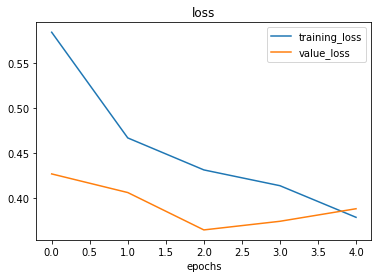

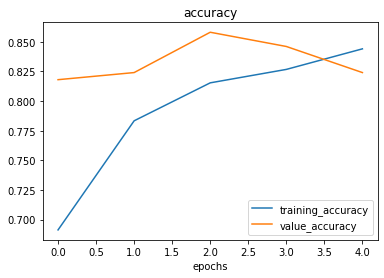

In [ ]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDataGenerator traininga instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255., 
                                             rotation_range=0.2,  # how much do you want to rotate an image?
                                             shear_range=0.2,  # how much do you want to shear an image?
                                             zoom_range=0.2,    # zoom in randomly on an image?
                                             width_shift_range=0.2, # move your image around x-axis?
                                             height_shift_range=0.2, # move your image around on the y-axis?
                                             horizontal_flip=True)  # do you want to flip and image?

# Create ImageDataGenerator without augmentation
train_data = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without augmentation for test dataset
test_data = ImageDataGenerator(rescale=1/255.)

**Question:** What is data augemtation?

Data augemtation is the process of altering our training data, leading it to more diversity and in turn allowing  our model to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of image, flipping it, croping it or something similar.

Let's write some code to visualize data augmentation...

In [ ]:
# Import data and augment it from train directory
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False) # For demonstration purpose only

# Create non-augmented train data batches
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

IMG_SIZE=(224, 224)
# Create non-augmented test data batches
print("Non-augmented test data:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary")

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented test data:
Found 500 images belonging to 2 classes.


**Note:** Data augmentation is usually performed on training data. using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but modified as they are loaded into the model.

Finally...let's visualize some augmented data!!!

In [ ]:
# Get a sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels aren't augmented... only data(images)



showing image number: 10


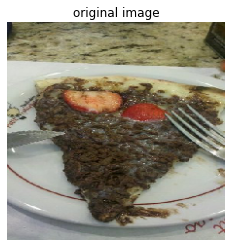

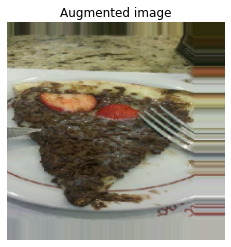

In [ ]:
# Show original images and augmented images
import random
random_number = random.randint(0, 32) # bcz our batch size is 32
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);


Now we've seen what augmented training data look like, let's build a model and see how it learns on augmented data. 

In [ ]:
# Create a model(same as above model_5)
model_6 = Sequential([
   Conv2D(10, 3, activation="relu"),
   MaxPool2D(pool_size=2),
   Conv2D(10, 3, activation="relu"),
   MaxPool2D(),
   Conv2D(10, 3, activation="relu"),
   MaxPool2D(),
   Flatten(),
   Dense(1, activation="sigmoid")

])


# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 549ms/step - loss: 0.7219 - accuracy: 0.4387 - val_loss: 0.6917 - val_accuracy: 0.5020
Epoch 2/5
47/47 [==============================] - 26s 549ms/step - loss: 0.6935 - accuracy: 0.4993 - val_loss: 0.6752 - val_accuracy: 0.6620
Epoch 3/5
47/47 [==============================] - 39s 843ms/step - loss: 0.7063 - accuracy: 0.5980 - val_loss: 0.6632 - val_accuracy: 0.5720
Epoch 4/5
47/47 [==============================] - 25s 542ms/step - loss: 0.6821 - accuracy: 0.5733 - val_loss: 0.6638 - val_accuracy: 0.5020
Epoch 5/5
47/47 [==============================] - 25s 531ms/step - loss: 0.6662 - accuracy: 0.6007 - val_loss: 0.5906 - val_accuracy: 0.7700


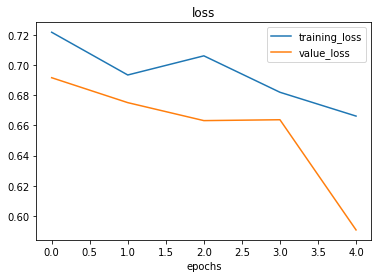

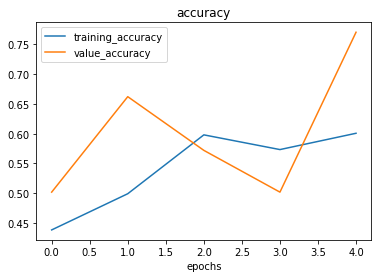

In [ ]:
# check our model training curves
plot_loss_curves(history_6)

Let's shuffle our training data and train another model(same as before) on it and see what happens

In [ ]:
# Import data and augment it and shuffle from training directory
train_data_augmented_shuffled = train_datagen.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode="binary",
                                                                  shuffle=True) # Shuffle data this time

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model (Same as model_5 and model_6)
model_7 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(), 
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")                   
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, # we're fitting on augmented and shuffled data now
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 226ms/step - loss: 0.5934 - accuracy: 0.6740 - val_loss: 0.4189 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 12s 266ms/step - loss: 0.4537 - accuracy: 0.7940 - val_loss: 0.4193 - val_accuracy: 0.7940
Epoch 3/5
47/47 [==============================] - 10s 219ms/step - loss: 0.4110 - accuracy: 0.8207 - val_loss: 0.3275 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 10s 219ms/step - loss: 0.3931 - accuracy: 0.8307 - val_loss: 0.3125 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 10s 218ms/step - loss: 0.3796 - accuracy: 0.8393 - val_loss: 0.3377 - val_accuracy: 0.8440


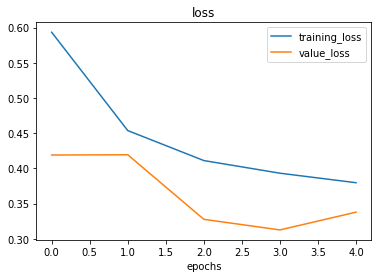

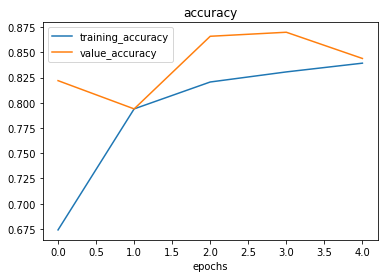

In [ ]:
# Plot loss curves
plot_loss_curves(history_7)

**Note:** When shuffling training data, the model gets exposed to all kinds of data during training, thus enablin it to learn feature across a wide area of images(in our case pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat untill satisfied

Since we've already beaten our baseline, there are few things we could try to continue to improve our model:

* Increase the number of model layers (e.g add more `Conv2D`/ `MaxPool2D` layers)
* Increase the number filters in each convulational layer (e.g 10 to 32 or even 64)
* Train for longer (more epochs) 
* Find ideal learning rate
* Get more data (give model more oppertunities to learn)
* Use **Transfer learning** to leverage what an other model image has learn and adjust it for our own use case.

 **Practice:** Recreate the model on CNN explainer website (same as `model_1`) and see how it performs on the augmented shuffled training data.

## Making a prediction with our trained model on our own custom data

In [ ]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2022-02-07 17:35:28--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2022-02-07 17:35:29 (27.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



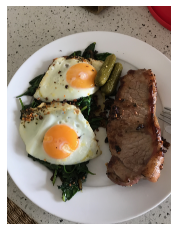

In [ ]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [ ]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

**Note:** When you train a neural network and you want to make a prediction with it on your on custom data, it's  importent then your custom data( or new data) is to preprocessed into the same format as the data your model was trained on.

In [ ]:
# Create a function to import and image and resize is to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshape it
  to(img_shape, img_shape, colour_channels.)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image(get all the value between 0 and 1)
  img = img/255.
  return img

In [ ]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))

Looks like our custom image is being put through our model, however, it curently outputs a prediction probability, would'nt it be nice if we could visualize the image as well as the model's prediction?

In [ ]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probabilty and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, make a prediction with a model
  and plot the image with the predicted clas as title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)
  
  # Make a prediction
  pred = model.predict(tf.expand_dims(steak, axis=0))

  # Get the predicted class
  pred = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

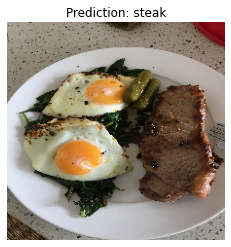

In [ ]:
# Test our model on custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works!Let's try it on another image...this time pizza

--2022-02-07 17:35:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.08s   

2022-02-07 17:35:47 (35.4 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



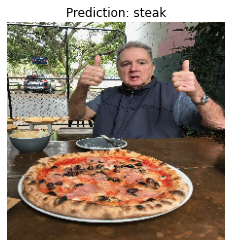

In [ ]:
# Downlaod a custom image and make a prediction on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image Classification

We've just been through a bunch of the following steps with binary classification problem(pizza vs. steak), now we're going to step things up a notch with 10 classes of food (mutli-class classification) 

1. Become one with data 
2. Preprocess the data (get it ready for a model)
3. Create a model (start with basleline)
4. Fit the model(overfit to make sure it work)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat untill satisfied

## 1. Import and become one with data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref =zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close() 

--2022-02-07 17:35:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 108.177.125.128, 142.250.157.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  77.1MB/s    in 7.9s    

2022-02-07 17:35:57 (62.3 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os


# walk through 10 classes of food image data
for dirpath, dirnames, dirfilenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 750 images in '10_food_classes_all_data'.
There are 10 directories and 750 images in '10_food_classes_all_data/test'.
There are 0 directories and 750 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/test/steak'.
There 

In [ ]:
# Setup the train and test directory
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*") ]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['879355.jpg']
image shape: (512, 512, 3)


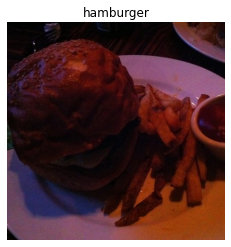

In [ ]:
# visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data from directories and turns it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with a baseline)

We've been talking a lot about CNN explainer website...how about if we just take their model also on 10 classes and use it for our problem...?

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create our model (very similat to previous models but actually the same as the CNN explainer website)
model_8= Sequential([
  Conv2D(10, 3, input_shape=(224, 224, 3)),
  Activation(activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(), 
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")  # changed to have 10 neurons and used the softmax activation function                  
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


### 4. Fit a model

In [ ]:
# Fit the model
history_8 = model_8.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 58s 244ms/step - loss: 2.1638 - accuracy: 0.2009 - val_loss: 2.0997 - val_accuracy: 0.2276
Epoch 2/5
235/235 [==============================] - 55s 236ms/step - loss: 1.9155 - accuracy: 0.3373 - val_loss: 1.9933 - val_accuracy: 0.2900
Epoch 3/5
235/235 [==============================] - 56s 240ms/step - loss: 1.6563 - accuracy: 0.4371 - val_loss: 1.9447 - val_accuracy: 0.3264
Epoch 4/5
235/235 [==============================] - 56s 238ms/step - loss: 1.1861 - accuracy: 0.6021 - val_loss: 2.2893 - val_accuracy: 0.2880
Epoch 5/5
235/235 [==============================] - 56s 238ms/step - loss: 0.5844 - accuracy: 0.8119 - val_loss: 3.3804 - val_accuracy: 0.2604


### 5. Evaluate the model

In [ ]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 13s 162ms/step - loss: 3.3804 - accuracy: 0.2604


[3.3803820610046387, 0.2603999972343445]

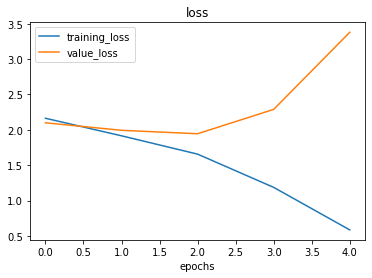

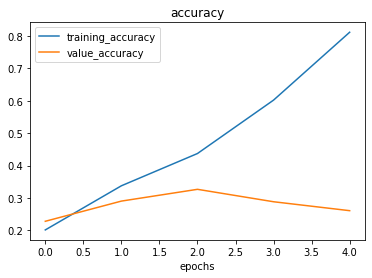

In [ ]:
# Check out model's loss curves on the 10 classes
plot_loss_curves(history_8) 

What do these loss curves tell us?

well...it seems like our model is **overfitting** the training set quite badly...in other words, it's getting great results on the training data but fail to genralize well to unseen data and performs poortly on the test dataset.

### 6. Adjust the hyperperameters (to beat the baseline/reduce overfitting)

Due to it's performance on the training data, it's clear our model is learning something...

However, it's not genralizing well to unseen data(overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more oppertunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfiting the data, it may be too complicated of a model, one way to simplify a model is to: reduce # of layers or reduce # of hidden unit in layers
* **Use data augmentation** - data augmentation manipulates the training data in shuch a way to add more diversity to it (without altering the origonal data)
* **Transfer learning** - transfer learning leverages tha patterns another model has learned on similar data to your own and allow you to use those patterns on your on data set. 

In [ ]:
# How about we try and simlify the model first?
# Let's try to remove 2 convolutional layers...
model_9 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(), 
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax")                
])

# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


In [ ]:
# Fit the model with 2x conv layer removed
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 64s 270ms/step - loss: 2.3387 - accuracy: 0.2257 - val_loss: 1.9889 - val_accuracy: 0.2984
Epoch 2/5
235/235 [==============================] - 83s 355ms/step - loss: 1.7796 - accuracy: 0.3944 - val_loss: 1.9762 - val_accuracy: 0.3020
Epoch 3/5
235/235 [==============================] - 76s 321ms/step - loss: 1.4456 - accuracy: 0.5223 - val_loss: 1.9387 - val_accuracy: 0.3332
Epoch 4/5
235/235 [==============================] - 85s 363ms/step - loss: 1.0698 - accuracy: 0.6532 - val_loss: 2.1249 - val_accuracy: 0.3236
Epoch 5/5
235/235 [==============================] - 57s 244ms/step - loss: 0.6806 - accuracy: 0.7917 - val_loss: 2.4750 - val_accuracy: 0.3060


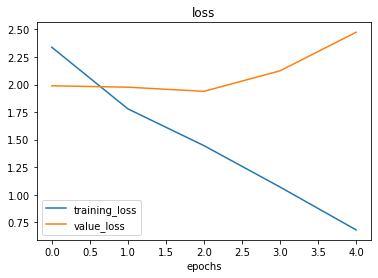

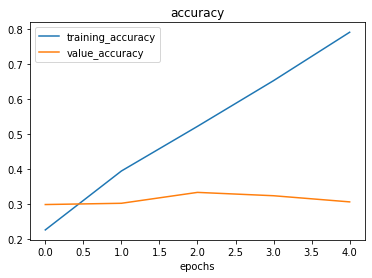

In [ ]:
# Check out the loss curves of model 9
plot_loss_curves(history_9)

Looks like our "simplifying the model" experiment didn't work ... the accuracy went down and overfitting continud..

How about we try data augmentation?



### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...

Idealy we want to:
* Reduce overfitting (get the validation and train lose curves closer)
* Improve validation accuracy

In [ ]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [ ]:
# Let's create an another model but this time we'll fit it on the augmented training data of 10 classes
model_10 = tf.keras.models.clone_model(model_8)

# compile the cloned model(setup as the same as previous)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

In [ ]:
# Fit the model
history_10 = model_10.fit(train_data_augmented, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 130s 552ms/step - loss: 2.3129 - accuracy: 0.1237 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 2/5
235/235 [==============================] - 132s 561ms/step - loss: 2.2998 - accuracy: 0.1289 - val_loss: 2.3032 - val_accuracy: 0.0996
Epoch 3/5
235/235 [==============================] - 128s 546ms/step - loss: 2.2963 - accuracy: 0.1263 - val_loss: 2.3035 - val_accuracy: 0.1000
Epoch 4/5
235/235 [==============================] - 128s 547ms/step - loss: 2.2923 - accuracy: 0.1296 - val_loss: 2.3041 - val_accuracy: 0.1000
Epoch 5/5
235/235 [==============================] - 134s 569ms/step - loss: 2.2921 - accuracy: 0.1237 - val_loss: 2.3045 - val_accuracy: 0.1000


In [ ]:
model_8.evaluate(train_data)

235/235 [==============================] - 38s 160ms/step - loss: 0.2436 - accuracy: 0.9457


[0.24360275268554688, 0.9457333087921143]

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 13s 159ms/step - loss: 2.3028 - accuracy: 0.1000


[2.3028411865234375, 0.10000000149011612]

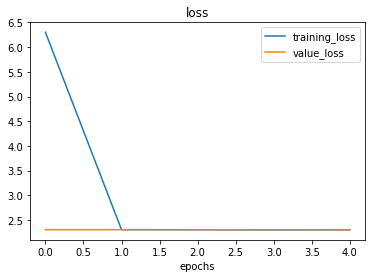

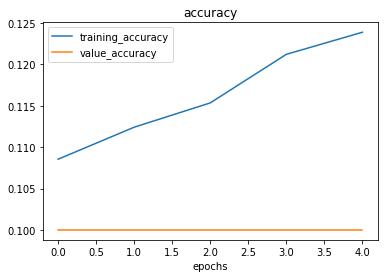

In [ ]:
# check our model trained on augmented data loss curves
plot_loss_curves(history_10)

Woah! That look much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainely not the wrong direction) so if we were train to longer, we might see furthe improvements.

### 7. Repeat untill satisfied

We could keep going here... continelly trying bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restrucuring our model architecture (increasing layers/hidden units)
- adjust the learning rata
- try different method of data augmentation (adjust the hyperperameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning** 

### Making a prediction with our trained model

Let's use our trained model to make some prediction on our own custom images!

In [ ]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2022-02-07 18:44:12--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.09s   

2022-02-07 18:44:12 (31.3 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

--2022-02-07 18:44:12--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awai

In [ ]:
list(class_names)

['chicken_curry',
 'chicken_wings',
 'fried_rice',
 'grilled_salmon',
 'hamburger',
 'ice_cream',
 'pizza',
 'ramen',
 'steak',
 'sushi']

In [ ]:
#  Renconfig pred_and_plot function to work with multi_class image
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, make a prediction with a model
  and plot the image with the predicted clas as title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)
  
  # Make a prediction
  pred = model.predict(tf.expand_dims(steak, axis=0))

  print(len(pred[0]))
  print(tf.argmax(pred))

  # Add in logic for multi-class & get pred_class name
  if len(pred[0]) > 1:
     pred_class = class_names[tf.argmax(pred[0])]

  else:
    pred = class_names[int(tf.round(pred[0]))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

10
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


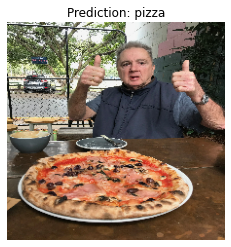

In [ ]:
# Make prediction using model 10
pred_and_plot(model=model_10,
              filename="03-pizza-dad.jpeg.1",
              class_names=class_names)

10
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


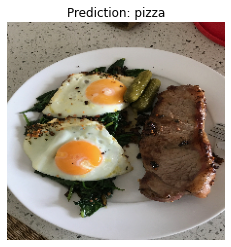

In [ ]:
pred_and_plot(model=model_10,
              filename="03-steak.jpeg.1",
              class_names=class_names)

10
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


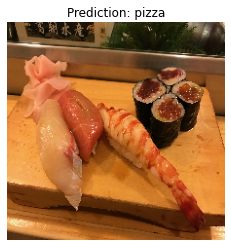

In [ ]:
pred_and_plot(model=model_10,
              filename="03-sushi.jpeg",
              class_names=class_names)

10
tf.Tensor([0 0 0 0 0 0 0 0 0 0], shape=(10,), dtype=int64)


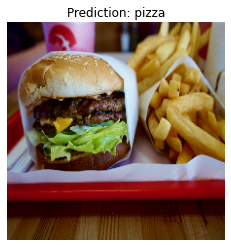

In [ ]:
pred_and_plot(model=model_10,
              filename="03-hamburger.jpeg",
              class_names=class_names)

Look like our model did not perform very well on our custom images but this because it only acieved ~39% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

1
tf.Tensor([0], shape=(1,), dtype=int64)


UnboundLocalError: ignored

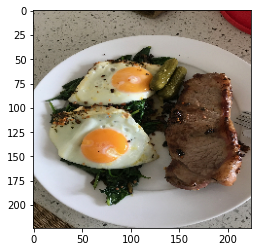

In [ ]:
# Good news: our updated pred_and_plot works for binary classification to...
pred_and_plot(model=model_3, # trained on pizza vs. steak
              filename="03-steak.jpeg",
              class_names=["pizza", "steak"])

### Saving and loading our model

In [ ]:
# Save model
model_10.save("saved_trained_model_10")

INFO:tensorflow:Assets written to: saved_trained_model_10/assets


In [ ]:
# Laod in trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 15s 189ms/step - loss: 2.3045 - accuracy: 0.1000


[2.3044769763946533, 0.10000000149011612]

In [ ]:
# compare our load model to existing model
model_10.evaluate(test_data)

79/79 [==============================] - 16s 200ms/step - loss: 2.3045 - accuracy: 0.1000


[2.3044772148132324, 0.10000000149011612]